### NASA WorldView satellite images

In [33]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import cfgrib
import cf2cdm
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import xarray as xr
from datetime import datetime, timedelta
import urllib.request
from cfgrib.xarray_store import open_dataset
import warnings
import h5py

import matplotlib.image as mpimg

In [34]:
os.chdir('/data2/willytsai/InSAR_HRRR/WORLDVIEW_fig/')

In [39]:
# Loading satellite images
files = sorted(glob('image_*'))

In [40]:
files

['image_20150322.png',
 'image_20150403.png',
 'image_20150415.png',
 'image_20150509.png',
 'image_20150626.png',
 'image_20150720.png',
 'image_20150906.png',
 'image_20160104.png',
 'image_20160221.png',
 'image_20160316.png',
 'image_20160409.png',
 'image_20160503.png',
 'image_20160527.png',
 'image_20160714.png',
 'image_20160807.png',
 'image_20161105.png',
 'image_20161129.png',
 'image_20161223.png',
 'image_20170116.png',
 'image_20170305.png',
 'image_20170317.png',
 'image_20170422.png',
 'image_20170516.png',
 'image_20170528.png',
 'image_20170609.png',
 'image_20170621.png',
 'image_20170703.png',
 'image_20170715.png',
 'image_20170727.png',
 'image_20170808.png',
 'image_20170820.png',
 'image_20170901.png',
 'image_20170913.png',
 'image_20170925.png',
 'image_20171007.png',
 'image_20171019.png',
 'image_20171031.png',
 'image_20171112.png',
 'image_20171124.png',
 'image_20171206.png',
 'image_20171218.png',
 'image_20171230.png',
 'image_20180111.png',
 'image_201

In [41]:
len(files)

118

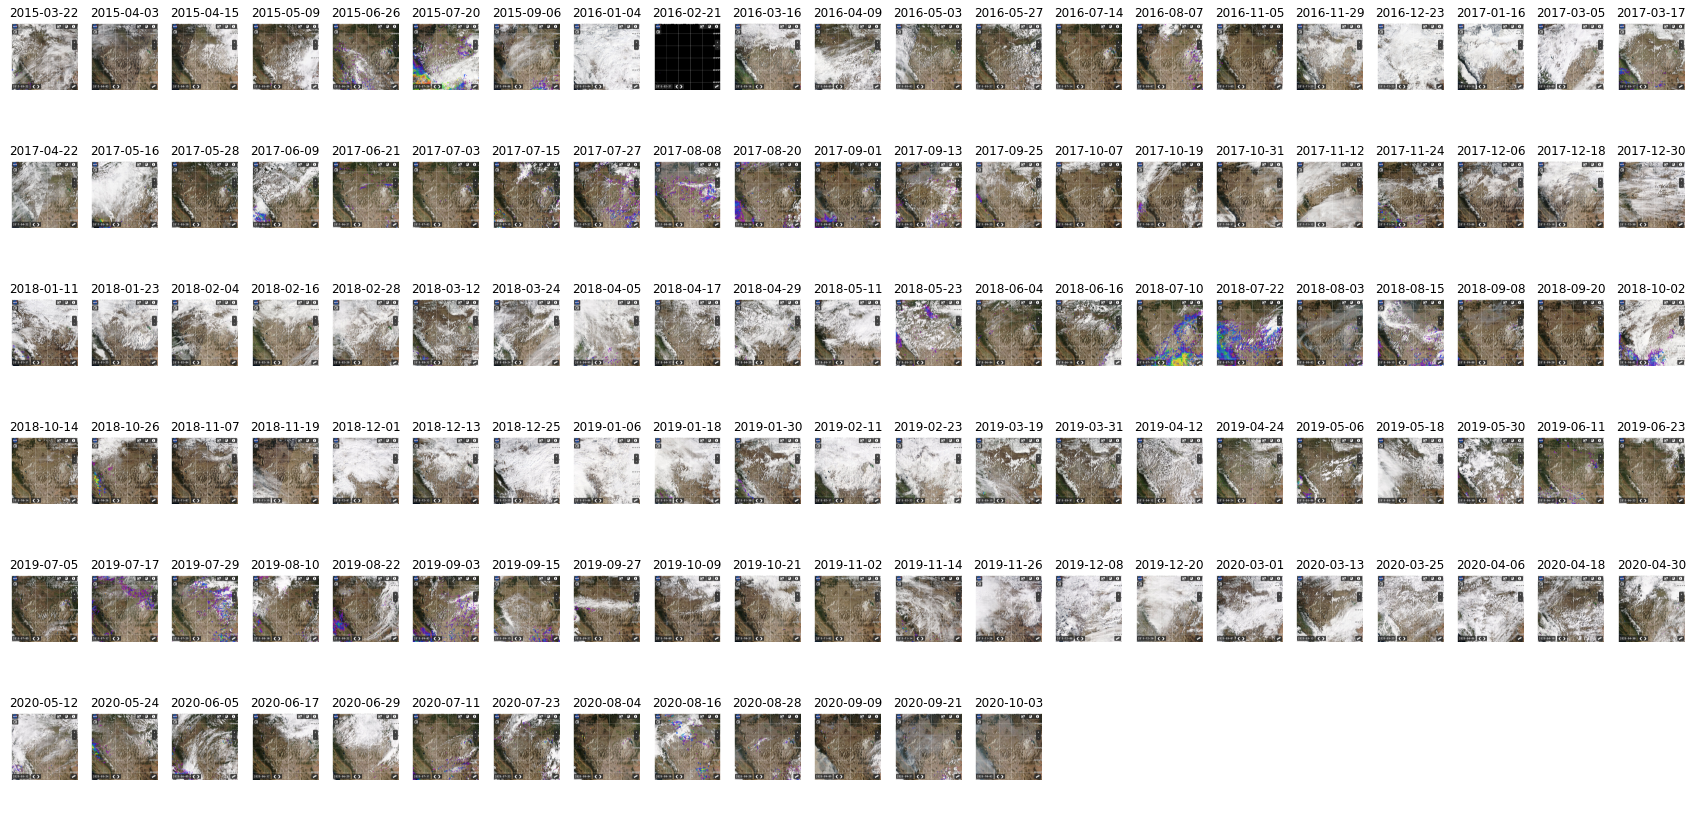

In [42]:
rows,remainder = np.divmod(len(files),21)
row = np.repeat(np.arange(0,rows+1),21)
col = np.tile(np.arange(0,21),rows+1)

# plotting pwat_diff timeseries
fig,ax = plt.subplots(rows+1,21,figsize=(30,15))
for t in range(len(col)):
    try:
        img = mpimg.imread(files[t])
        ax[row[t],col[t]].imshow(img,aspect='equal')
        ax[row[t],col[t]].set_xticks([]);ax[row[t],col[t]].set_yticks([])
        ax[row[t],col[t]].spines['bottom'].set_color('w')
        ax[row[t],col[t]].spines['top'].set_color('w') 
        ax[row[t],col[t]].spines['right'].set_color('w')
        ax[row[t],col[t]].spines['left'].set_color('w')
        ax[row[t],col[t]].set_title(files[t][6:10]+'-'+files[t][10:12]+'-'+files[t][12:14],fontsize=12)
    except:
        ax[row[t],col[t]].set_xticks([]);ax[row[t],col[t]].set_yticks([])
        ax[row[t],col[t]].spines['bottom'].set_color('w')
        ax[row[t],col[t]].spines['top'].set_color('w') 
        ax[row[t],col[t]].spines['right'].set_color('w')
        ax[row[t],col[t]].spines['left'].set_color('w')
        
#plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.2)
fig.patch.set_facecolor('white')

In [43]:
fig.savefig('Satellite_timeseries.png',bbox_inches='tight',dpi=300)